In [1]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
import pytorch_lightning as pl
import segmentation_models_pytorch as smp

import albumentations as albu

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

In [5]:
model = PetModel("UNet", "timm-mobilenetv3_small_100", in_channels=1, out_classes=1)
state_dict = torch.load('../data/qrcode-unet-mbv3-100.2.pth')
model.load_state_dict(state_dict)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_mobilenetv3_small_100-37f49e2b.pth" to /root/.cache/torch/hub/checkpoints/tf_mobilenetv3_small_100-37f49e2b.pth
100%|██████████| 9.78M/9.78M [00:03<00:00, 3.29MB/s]


<All keys matched successfully>

tensor(0.) tensor(1.)


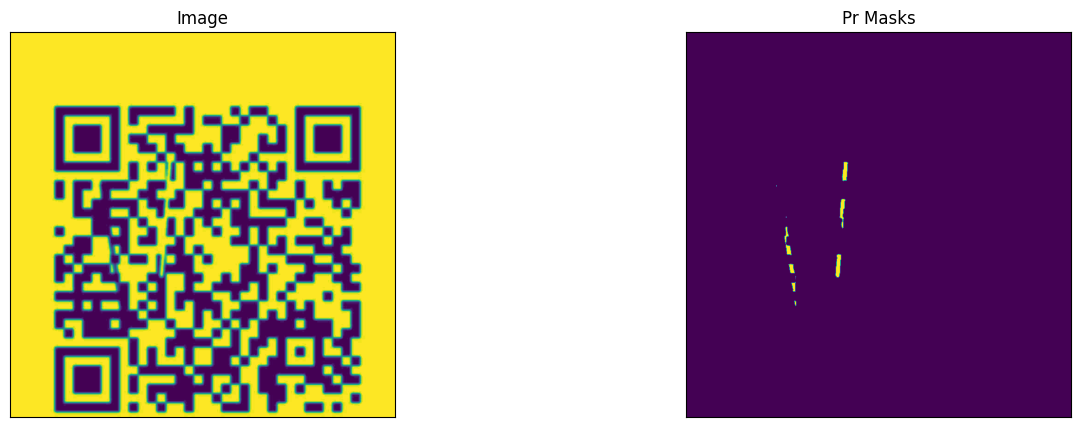

In [8]:
image = cv2.imread('../BarcodeBlemish/QRCodeDatasets/defective/000110.png', 0)

with torch.no_grad():
    model.eval()
    image_tensor = model.preprocess(image)
    logits = model(image_tensor)
    pr_masks = logits.sigmoid()
    print(pr_masks.min(), pr_masks.max())

visualize(image=image, pr_masks=pr_masks[0][0])